In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. Data Import & Engineering

Abbreviations:

Cryptocurrency Adoption = C, Democracy = D, Education = E, Gini Index = G, Gross Domestic Product = GDP, 
Human Development Index = HDI, Corruption, Perception Index = CPI, Regulatory Quality = RQ, Control of Corruption = CC, Economic Freedom Index = EF, Network Readiness Index = N

AC = Account (% age 15+),  BFI = Borrowed any money from a formal financial institution (% age 15+), BMM = Borrowed any money using a mobile money account (% age 15+), CredC =  Owns a credit card (% age 15+), DebC = Owns a debit card (% age 15+), RDP = Received digital payments (% age 15+), DEP = Made a deposit (% with a financial institution account, age 15+)

df_country_all = pd.read_csv("../crypto_adoption_emerging_countries/input/All Country Data.csv", index_col="Country")
df_country_all

In [106]:
#Load Financial Inclusion 2017 Data from World Bank and merge with other country data
df_fi_2017 = pd.read_csv("../crypto_adoption_emerging_countries/input/FI_Filtered_2017.csv", index_col="Country")
df_fi_2017 = df_fi_2017.fillna(0)
df_all_2017 = pd.merge(df_country_all, df_fi_2017, left_index=True, right_index=True)
df_all_2017

,C,D,E,G,GDP,HDI,CPI,RQ,CC,EF,N,AC,BFI,CredC,DebC,RDP,DEP
Country,,,,,,,,,,,,,,,,,
Afghanistan,0.000,2.85,0.414,29.70,2542.853,0.51,16,10.10,6.73,51.50,41.77,14.89,3.81,1.06,2.71,9.04,65.53
Albania,0.010,5.89,0.746,33.20,14534.109,0.80,35,63.94,33.17,66.50,46.57,40.02,12.52,8.02,26.89,22.25,56.00
Algeria,0.000,4.01,0.672,27.60,11894.859,0.75,35,7.69,29.33,46.20,35.30,42.78,4.95,3.24,19.97,17.31,54.35
Angola,0.016,3.72,0.500,51.30,7346.304,0.58,26,16.35,13.94,50.60,29.77,0.00,0.00,0.00,0.00,0.00,0.00
Argentina,0.174,7.02,0.855,41.40,22997.000,0.85,45,33.65,53.37,52.20,51.27,48.71,24.37,23.97,41.37,27.02,59.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.799,2.88,0.700,52.15,7344.079,0.71,16,0.48,4.33,25.90,34.14,73.49,27.66,28.85,66.07,46.32,82.86
Vietnam,0.443,3.08,0.630,35.70,10535.168,0.70,37,41.83,34.13,55.30,49.57,30.80,21.72,4.12,26.74,14.92,64.01
Yemen,0.005,1.95,0.350,36.70,2056.586,0.47,15,4.33,1.92,60.85,12.33,0.00,0.00,0.00,0.00,0.00,0.00


In [162]:
df_fi_2021 = pd.read_csv("../crypto_adoption_emerging_countries/input/FI_Filtered_2021.csv", index_col="Country")
df_fi_2021= df_fi_2021.fillna(0)
df_all_2021 = pd.merge(df_country_all, df_fi_2021, left_index=True, right_index=True)
df_all_2021

,C,D,E,G,GDP,HDI,CPI,RQ,CC,EF,N,AC,BFI,BMM,CredC,DebC,RDP,DEP
Country,,,,,,,,,,,,,,,,,,
Afghanistan,0.000,2.85,0.414,29.70,2542.853,0.51,16,10.10,6.73,51.50,41.77,9.65,2.05,0.00,0.00,2.60,4.33,0.00
Albania,0.010,5.89,0.746,33.20,14534.109,0.80,35,63.94,33.17,66.50,46.57,0.00,10.74,33.07,26.98,9.47,2.77,4.62
Algeria,0.000,4.01,0.672,27.60,11894.859,0.75,35,7.69,29.33,46.20,35.30,15.72,0.00,31.91,10.68,38.77,2.77,0.00
Angola,0.016,3.72,0.500,51.30,7346.304,0.58,26,16.35,13.94,50.60,29.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Argentina,0.174,7.02,0.855,41.40,22997.000,0.85,45,33.65,53.37,52.20,51.27,0.00,4.96,0.00,8.56,19.23,13.37,85.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.799,2.88,0.700,52.15,7344.079,0.71,16,0.48,4.33,25.90,34.14,5.33,17.90,4.35,0.18,0.00,0.00,52.76
Vietnam,0.443,3.08,0.630,35.70,10535.168,0.70,37,41.83,34.13,55.30,49.57,0.00,0.00,0.00,0.00,0.34,95.43,0.00
Yemen,0.005,1.95,0.350,36.70,2056.586,0.47,15,4.33,1.92,60.85,12.33,30.64,66.28,10.90,58.98,44.90,0.61,6.31


In [163]:
df_fi_2021

,AC,BFI,BMM,CredC,DebC,RDP,DEP
Country,,,,,,,
Afghanistan,9.65,2.05,0.00,0.00,2.60,4.33,0.00
Albania,0.00,10.74,33.07,26.98,9.47,2.77,4.62
Algeria,15.72,0.00,31.91,10.68,38.77,2.77,0.00
Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arab World,0.00,0.00,0.00,33.18,4.11,33.30,0.00
...,...,...,...,...,...,...,...
West Bank and Gaza,0.00,66.70,0.00,3.43,86.92,2.92,42.01
World,63.75,0.00,95.45,0.00,0.00,58.63,0.00
Yemen,30.64,66.28,10.90,58.98,44.90,0.61,6.31


# 2. Correlation Matrix for 2017 and 2021 Financial Inclusion Data

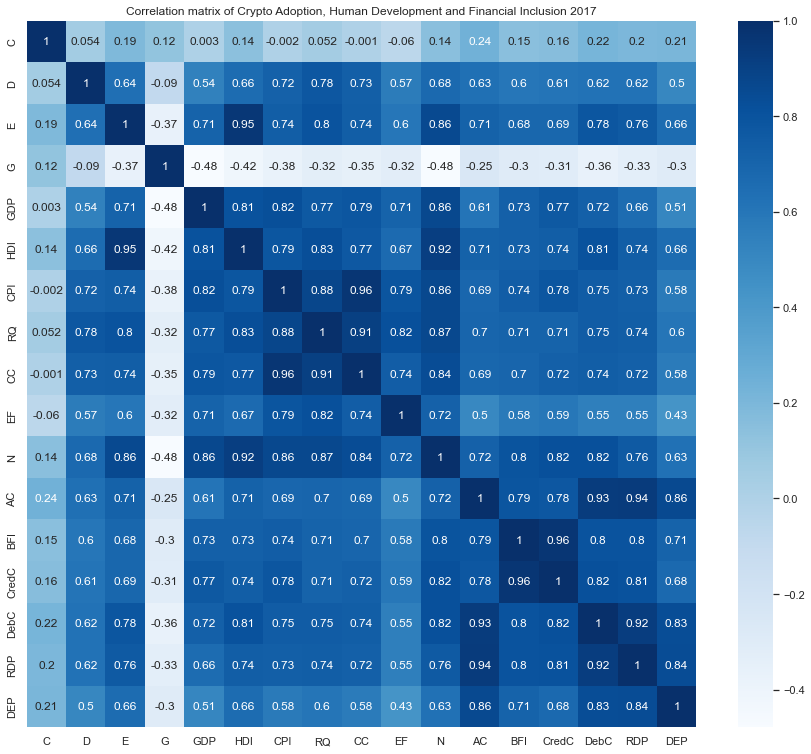

In [74]:
sns.set(rc={"figure.figsize":(15,13)})
hm_2017_corr = sns.heatmap(df_all_2017.corr().round(3), annot = True, cmap="Blues")
hm_2017_corr.set(title = "Correlation matrix of Crypto Adoption, Human Development and Financial Inclusion 2017")
plt.savefig("../crypto_adoption_emerging_countries/output/Corr_Matrix_2017.jpg")

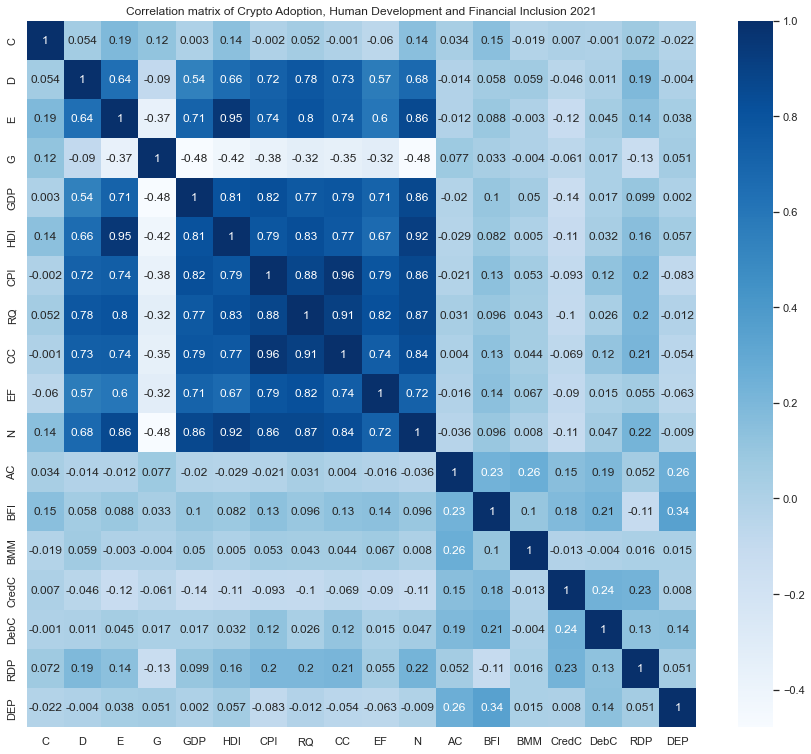

In [75]:
sns.set(rc={"figure.figsize":(15,13)})
hm_2021_corr = sns.heatmap(df_all_2021.corr().round(3), annot = True, cmap="Blues")
hm_2021_corr.set(title = "Correlation matrix of Crypto Adoption, Human Development and Financial Inclusion 2021")
plt.savefig("../crypto_adoption_emerging_countries/output/Corr_Matrix_2021.jpg")

# 3. Plotting Crypto Adoption with Financial Inclusion Indicators

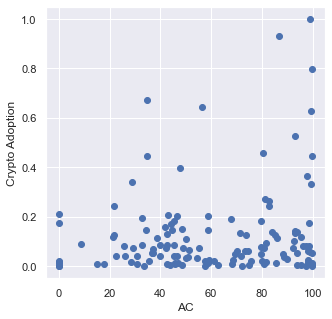

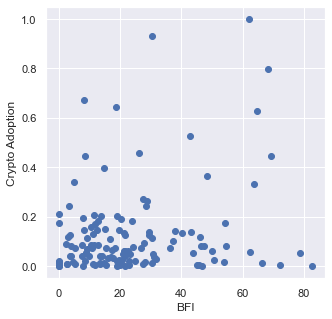

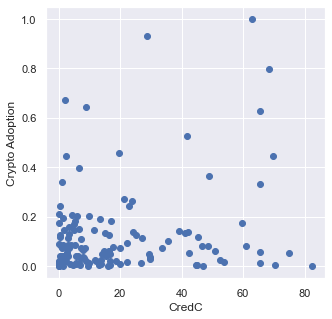

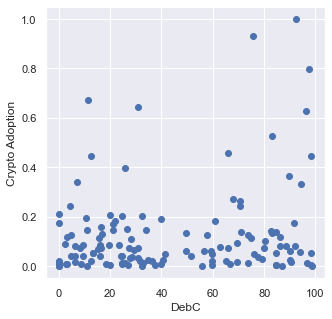

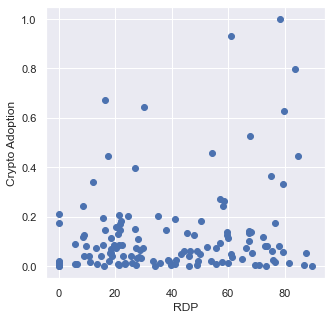

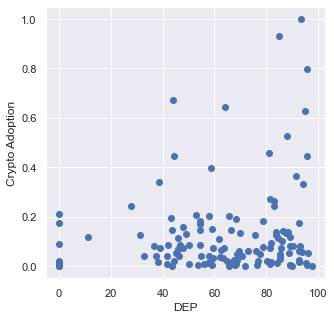

In [76]:
y=df_all_2017['C']

for n in range(11,17):
    x=df_all_2017.iloc[:,n].sort_values()
    plt.figure(figsize=(5, 5))
    plt.plot(x, y, 'o')
    plt.xlabel(str(df_all_2017.columns[n]))
    plt.ylabel('Crypto Adoption')
    plt.savefig("../crypto_adoption_emerging_countries/output/plots/Plot_Crypto_" + str(df_all_2017.columns[n]) + "2017.jpg")

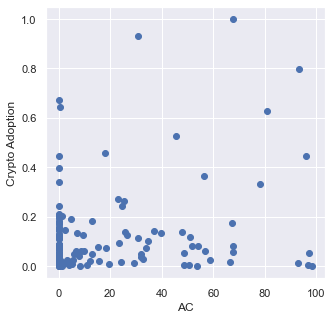

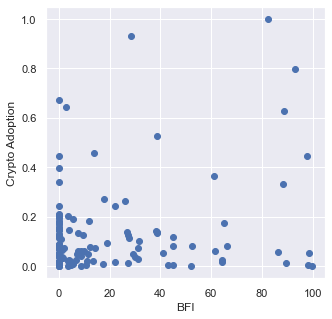

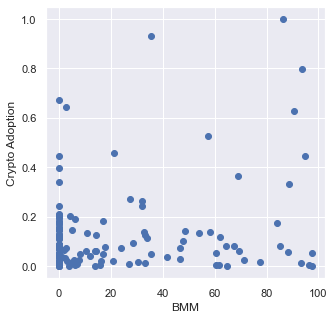

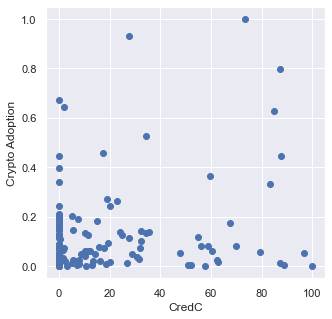

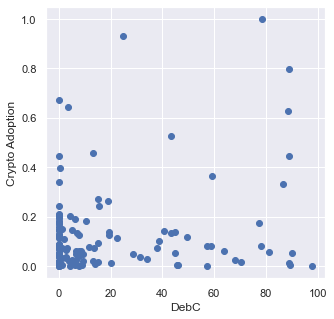

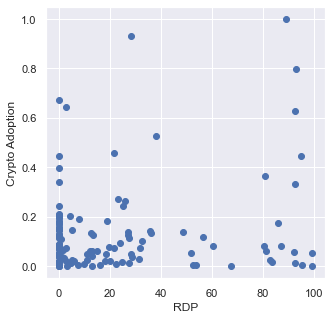

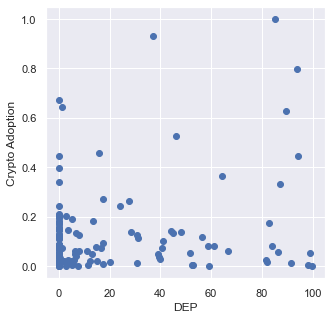

In [77]:
y=df_all_2021['C']

for n in range(11,18):
    x=df_all_2021.iloc[:,n].sort_values()
    plt.figure(figsize=(5, 5))
    plt.plot(x, y, 'o')
    plt.xlabel(str(df_all_2021.columns[n]))
    plt.ylabel('Crypto Adoption')
    plt.savefig("../crypto_adoption_emerging_countries/output/plots/Plot_Crypto_" + str(df_all_2021.columns[n]) + "2021.jpg")

# 4. Multivariate Regression - HDI and FC on Crypto Adoption

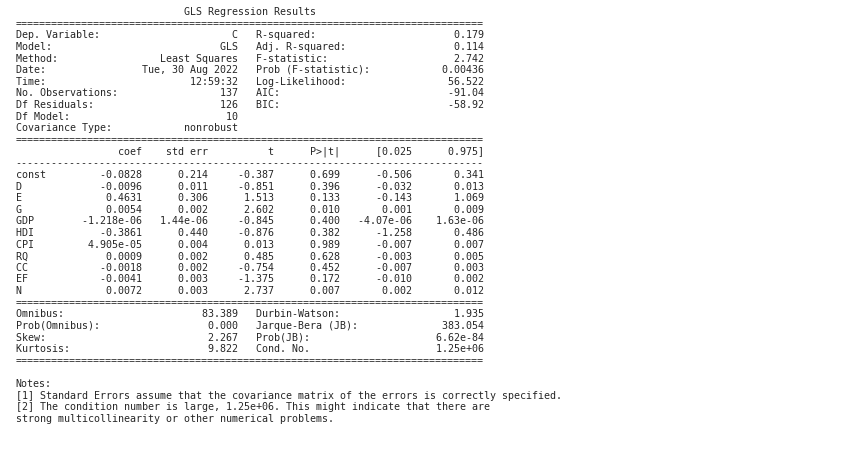

In [78]:
#Initial state as in Paper
x = df_country_all.loc[:, df_country_all.columns!='C']
y = df_country_all['C']

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model_init = sm.GLS(y, x).fit()
predictions = model_init.predict(x) 
 
print_model = model_init.summary()
#print(print_model)

#Save Result
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model_init.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('../crypto_adoption_emerging_countries/output/regression/model_init.png')

In [79]:
#Regressing only Crypto Adoption with Financial Inclusion 2017

#Adding Financial Inclusion Indicators with each round
y = df_all_2017['C']

# with statsmodels

columncount = 1

for n in range(12,18):
    x = df_all_2017.iloc[:, 11:n]
    x = sm.add_constant(x) # adding a constant

    model_2017_FC_only = sm.GLS(y, x).fit()
    predictions = model_2017_FC_only.predict(x) 

    print_model = model_2017_FC_only.summary()
    print(print_model)
    
    #Save Result
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, str(model_2017_FC_only.summary()), {'fontsize': 10}, fontproperties = 'monospace')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('../crypto_adoption_emerging_countries/output/regression/model_2017_FI_only_' + str(columncount) + '.png')
    
    #Increase count
    columncount = columncount + 1
    plt.clf()

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.058
Model:                            GLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.030
Date:                Tue, 30 Aug 2022   Prob (F-statistic):            0.00534
Time:                        12:59:33   Log-Likelihood:                 43.693
No. Observations:                 132   AIC:                            -83.39
Df Residuals:                     130   BIC:                            -77.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0357      0.035      1.007      0.3

<Figure size 864x504 with 0 Axes>

In [80]:
#Regressing only Crypto Adoption with Financial Inclusion 2021 - WITH BMM

#Adding Financial Inclusion Indicators with each round
y = df_all_2021['C']

# with statsmodels

columncount = 1

for n in range(12,19):
    x = df_all_2021.iloc[:, 11:n]
    x = sm.add_constant(x) # adding a constant

    model_2021_FC_only = sm.GLS(y, x).fit()
    predictions = model_2021_FC_only.predict(x) 

    print_model = model_2021_FC_only.summary()
    print(print_model)
    
    #Save Result
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, str(model_2021_FC_only.summary()), {'fontsize': 10}, fontproperties = 'monospace')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('../crypto_adoption_emerging_countries/output/regression/model_2021_FI_only_with_BMM_' + str(columncount) + '.png')
    
    #Increase count
    columncount = columncount + 1
    plt.clf()

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.001
Model:                            GLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.1488
Date:                Tue, 30 Aug 2022   Prob (F-statistic):              0.700
Time:                        12:59:33   Log-Likelihood:                 39.813
No. Observations:                 132   AIC:                            -75.63
Df Residuals:                     130   BIC:                            -69.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1223      0.019      6.437      0.0

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.045
Model:                            GLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.8301
Date:                Tue, 30 Aug 2022   Prob (F-statistic):              0.564
Time:                        12:59:34   Log-Likelihood:                 42.760
No. Observations:                 132   AIC:                            -69.52
Df Residuals:                     124   BIC:                            -46.46
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1130      0.027      4.149      0.0

<Figure size 864x504 with 0 Axes>

In [81]:
#Regressing only Crypto Adoption with Financial Inclusion 2021 - WITHOUT BMM

#Adding Financial Inclusion Indicators with each round
y = df_all_2021['C']
df_all_2021_no_bmm = df_all_2021.drop("BMM", axis=1)

# with statsmodels

columncount = 1

for n in range(12,18):
    x = df_all_2021_no_bmm.iloc[:, 11:n]
    x = sm.add_constant(x) # adding a constant

    model_2021_FC_only = sm.GLS(y, x).fit()
    predictions = model_2021_FC_only.predict(x) 

    print_model = model_2021_FC_only.summary()
    print(print_model)
    
    #Save Result
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, str(model_2021_FC_only.summary()), {'fontsize': 10}, fontproperties = 'monospace')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('../crypto_adoption_emerging_countries/output/regression/model_2021_FI_only_without_BMM_' + str(columncount) + '.png')
    
    #Increase count
    columncount = columncount + 1
    plt.clf()

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.001
Model:                            GLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.1488
Date:                Tue, 30 Aug 2022   Prob (F-statistic):              0.700
Time:                        12:59:34   Log-Likelihood:                 39.813
No. Observations:                 132   AIC:                            -75.63
Df Residuals:                     130   BIC:                            -69.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1223      0.019      6.437      0.0

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.042
Model:                            GLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9215
Date:                Tue, 30 Aug 2022   Prob (F-statistic):              0.482
Time:                        12:59:34   Log-Likelihood:                 42.594
No. Observations:                 132   AIC:                            -71.19
Df Residuals:                     125   BIC:                            -51.01
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1076      0.025      4.239      0.0

<Figure size 864x504 with 0 Axes>

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.238
Model:                            GLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3.375
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           0.000437
Time:                        12:41:22   Log-Likelihood:                 56.962
No. Observations:                 131   AIC:                            -89.92
Df Residuals:                     119   BIC:                            -55.42
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1092      0.214     -0.510      0.6

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.255
Model:                            GLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.629
Date:                Fri, 02 Sep 2022   Prob (F-statistic):            0.00192
Time:                        12:41:23   Log-Likelihood:                 58.486
No. Observations:                 131   AIC:                            -84.97
Df Residuals:                     115   BIC:                            -38.97
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0456      0.226     -0.202      0.8

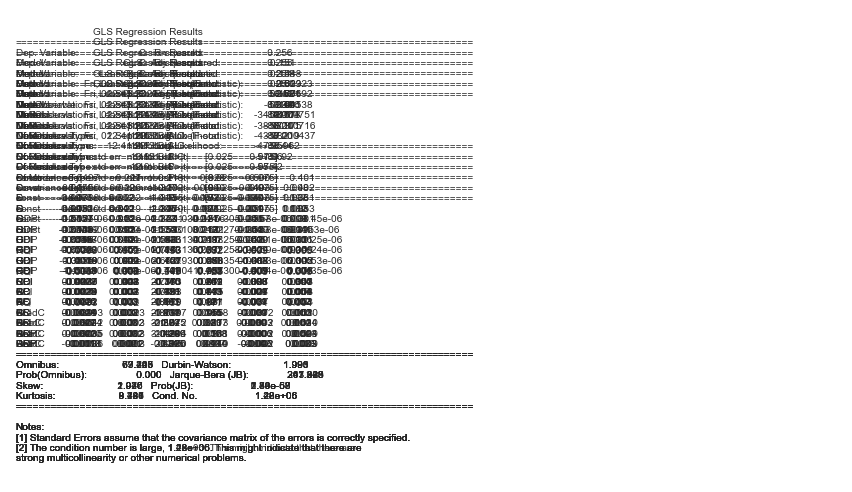

In [160]:
#Adding Financial Inclusion 2017 Indicators with each round
y = df_all_2017['C']

# with statsmodels

columncount = 1

for n in range(12,18):
    x = df_all_2017.iloc[:, 1:n]
    x = sm.add_constant(x) # adding a constant

    model_2017 = sm.GLS(y, x).fit()
    predictions = model_2017.predict(x) 

    print_model = model_2017.summary()
    print(print_model)
    
    #Save Result
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, str(model_2017.summary()), {'fontsize': 10}, fontproperties = 'monospace')
    plt.axis('off')
    plt.tight_layout()
    plt.plot
    plt.savefig('../crypto_adoption_emerging_countries/output/regression/model_2017_' + str(columncount) + '.png')
    
    #Increase count
    columncount = columncount + 1

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.202
Model:                            GLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     2.760
Date:                Tue, 30 Aug 2022   Prob (F-statistic):            0.00318
Time:                        12:59:36   Log-Likelihood:                 54.624
No. Observations:                 132   AIC:                            -85.25
Df Residuals:                     120   BIC:                            -50.65
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1019      0.219     -0.464      0.6

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.226
Model:                            GLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2.264
Date:                Tue, 30 Aug 2022   Prob (F-statistic):            0.00777
Time:                        12:59:36   Log-Likelihood:                 56.683
No. Observations:                 132   AIC:                            -81.37
Df Residuals:                     116   BIC:                            -35.24
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0743      0.222     -0.335      0.7

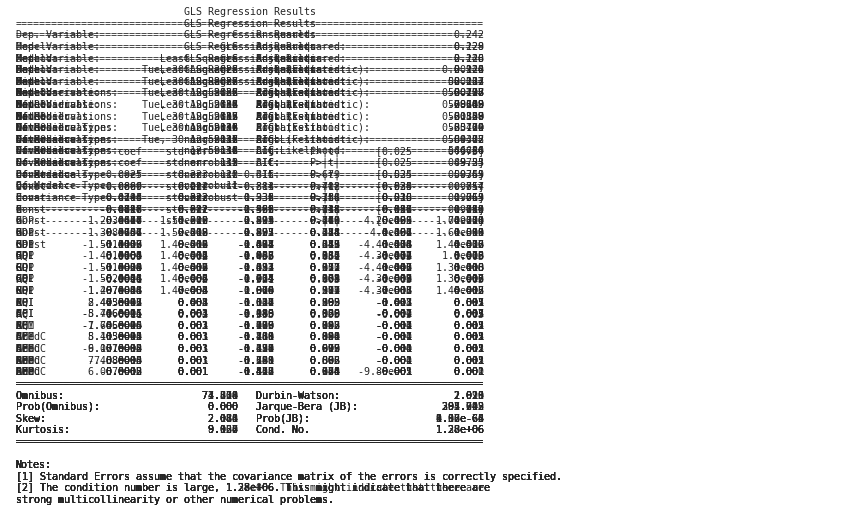

In [83]:
#Adding Financial Inclusion 2021 Indicators with each round - WITH BMM
y = df_all_2021['C']

# with statsmodels

for n in range(12,19):
    x = df_all_2021.iloc[:, 1:n]
    x = sm.add_constant(x) # adding a constant

    model_2021 = sm.GLS(y, x).fit()
    predictions = model_2021.predict(x) 

    print_model = model_2021.summary()
    print(print_model)
    
    #Save Result
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, str(model_2021.summary()), {'fontsize': 10}, fontproperties = 'monospace')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('../crypto_adoption_emerging_countries/output/regression/model_2021_with_BMM_' + str(columncount) + '.png')
    
    #Increase count
    columncount = columncount + 1

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.202
Model:                            GLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     2.760
Date:                Tue, 30 Aug 2022   Prob (F-statistic):            0.00318
Time:                        12:59:37   Log-Likelihood:                 54.624
No. Observations:                 132   AIC:                            -85.25
Df Residuals:                     120   BIC:                            -50.65
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1019      0.219     -0.464      0.6

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.228
Model:                            GLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2.280
Date:                Tue, 30 Aug 2022   Prob (F-statistic):            0.00730
Time:                        12:59:38   Log-Likelihood:                 56.792
No. Observations:                 132   AIC:                            -81.58
Df Residuals:                     116   BIC:                            -35.46
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0853      0.223     -0.383      0.7

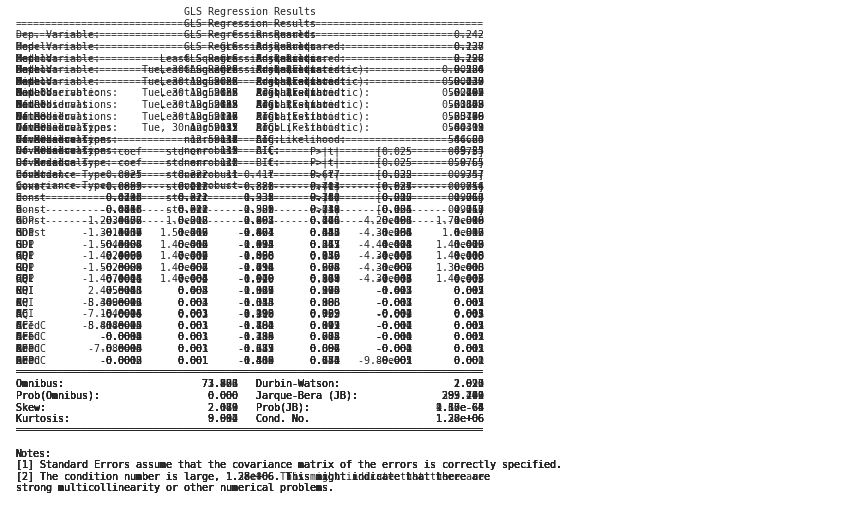

In [84]:
#Adding Financial Inclusion 2021 Indicators with each round - WITHOUT BMM
y = df_all_2021['C']
df_all_2021_no_bmm = df_all_2021.drop("BMM", axis=1)

# with statsmodels

for n in range(12,18):
    x = df_all_2021_no_bmm.iloc[:, 1:n]
    x = sm.add_constant(x) # adding a constant

    model_2021 = sm.GLS(y, x).fit()
    predictions = model_2021.predict(x) 

    print_model = model_2021.summary()
    print(print_model)
    
    #Save Result
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, str(model_2021.summary()), {'fontsize': 10}, fontproperties = 'monospace')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('../crypto_adoption_emerging_countries/output/regression/model_2021_without_BMM_' + str(columncount) + '.png')
    
    #Increase count
    columncount = columncount + 1

# 5. Box Plots - Top 5 Crypto Countries

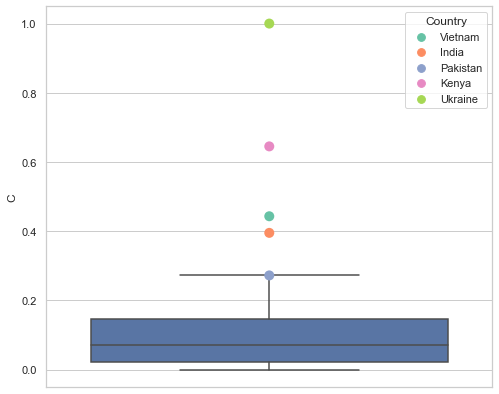

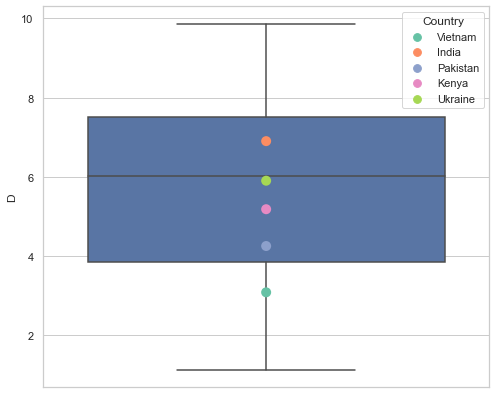

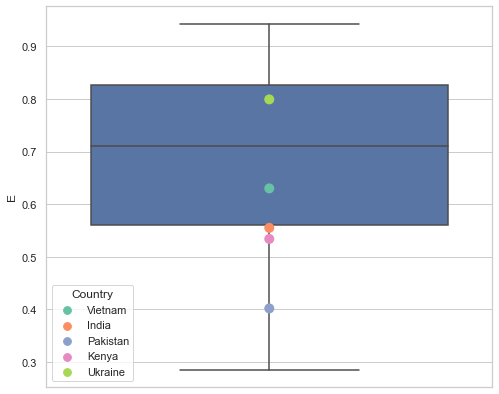

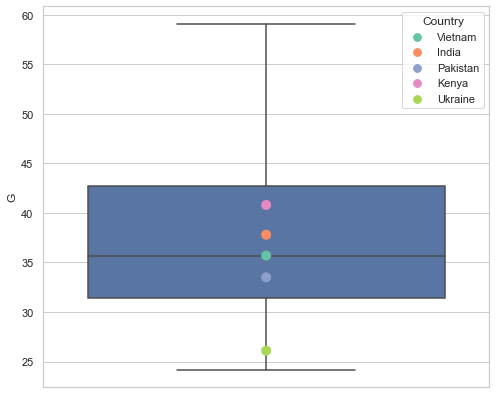

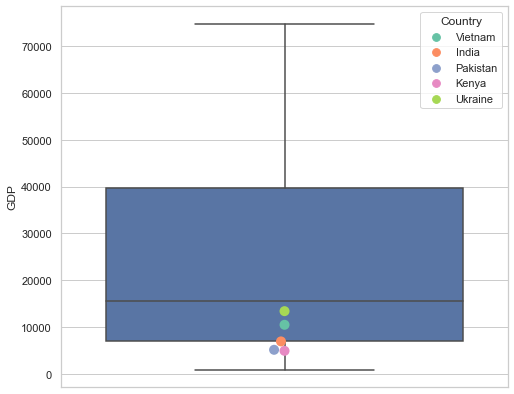

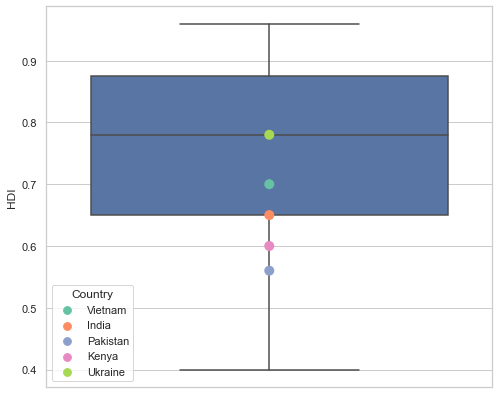

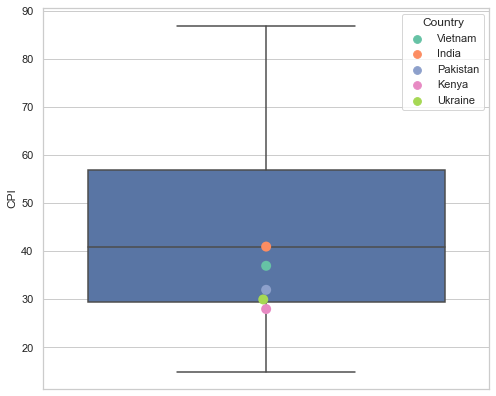

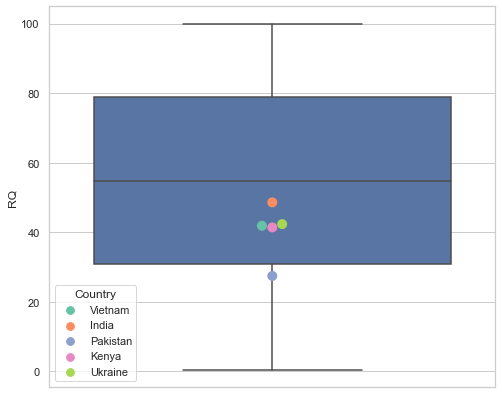

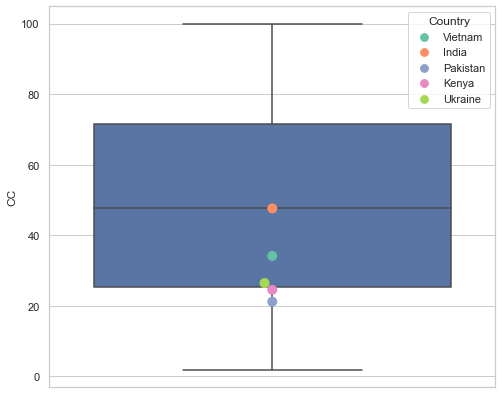

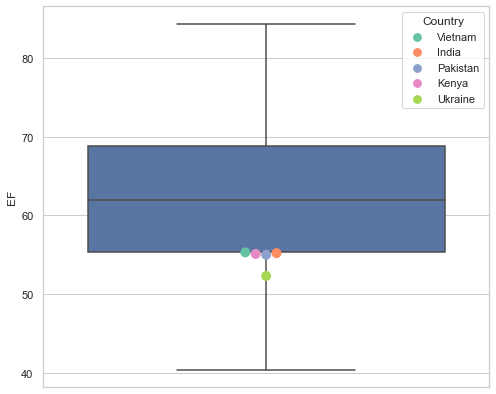

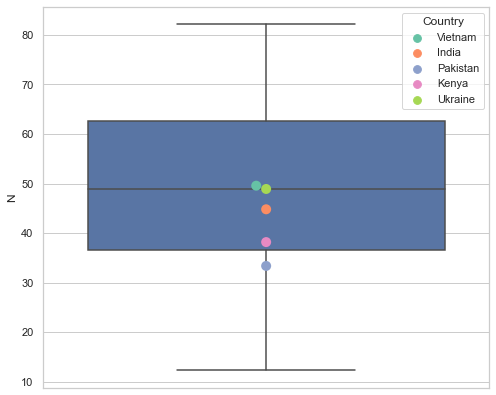

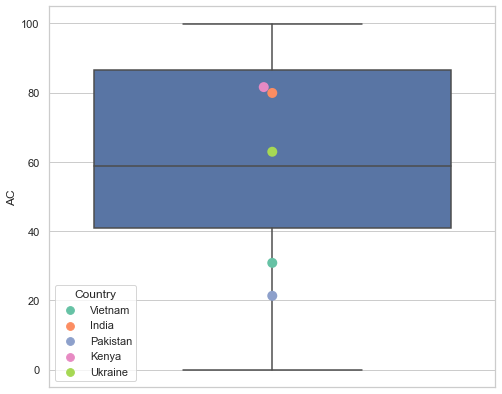

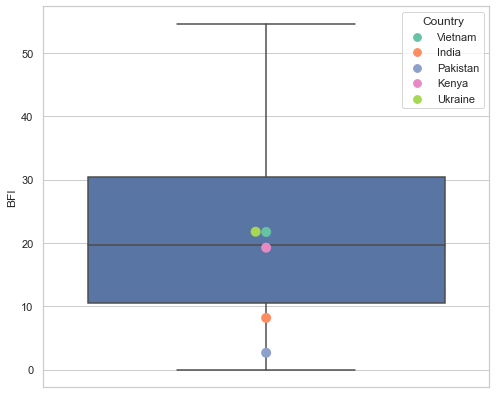

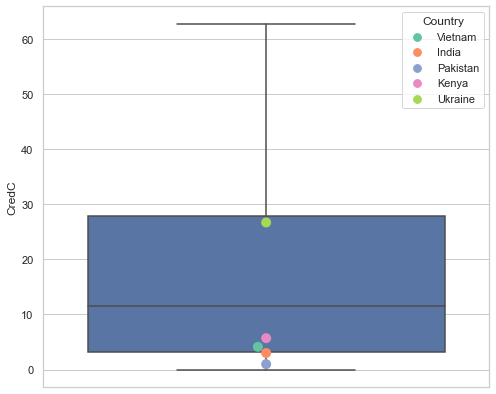

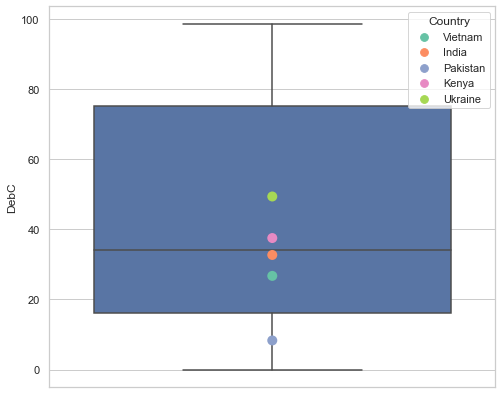

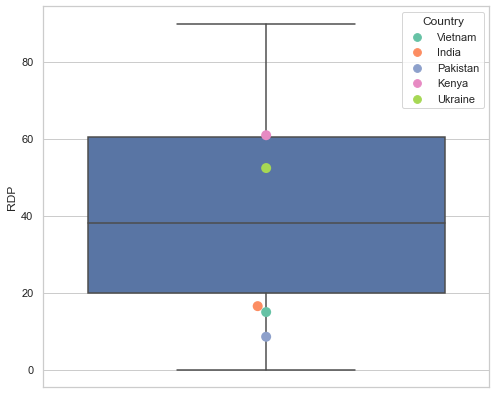

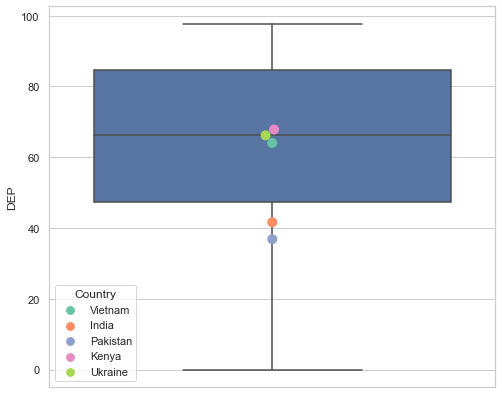

In [157]:
#Box Plots with 2017 Data
sns.set(style="whitegrid")
plt.rc('figure', figsize=(8, 7))
world = df_all_2017
top_5 = df_all_2017.filter(items =["Vietnam","India","Pakistan","Kenya","Ukraine"], axis = 0)
top_5 = top_5.reset_index()

for n in df_all_2017.columns:
    ax = sns.boxplot(y=df_all_2017[n], data=df_all_2017, showfliers = False)
    ax = sns.swarmplot(y=top_5[n], hue=top_5["Country"], x=[""]*len(top_5), data=top_5, palette="Set2", size=10)
    
    plt.savefig('../crypto_adoption_emerging_countries/output/box_plots/2017/box_plot_2017_' + n + '.png')
    plt.show()

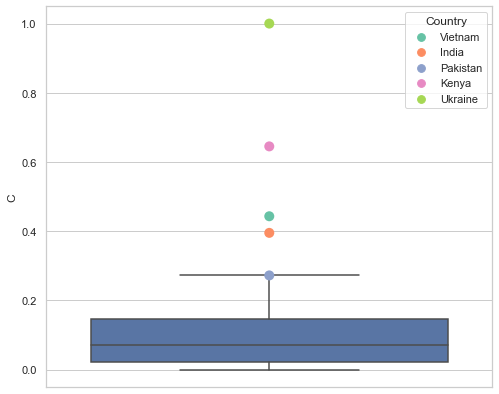

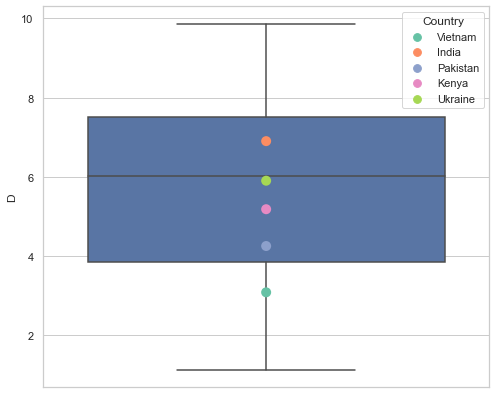

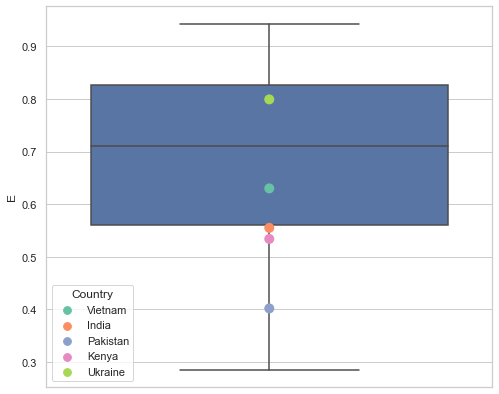

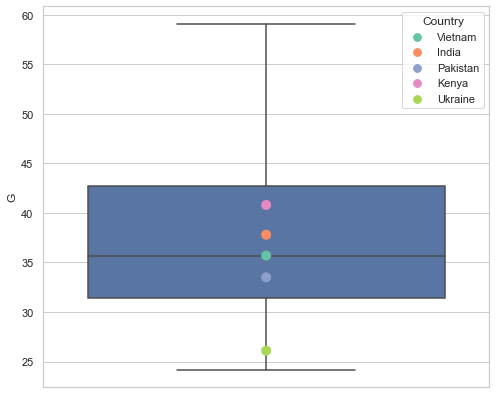

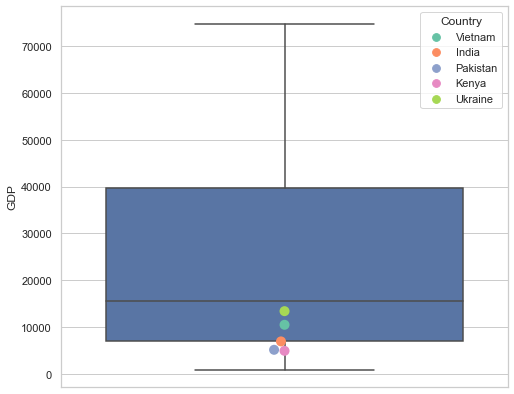

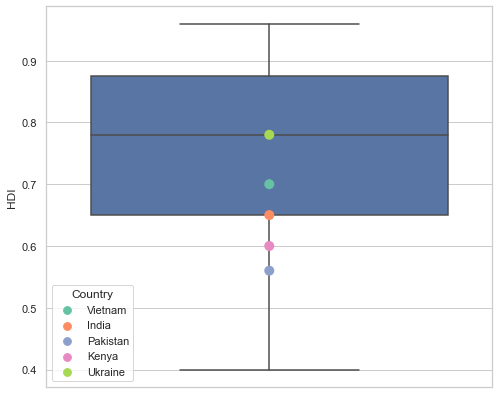

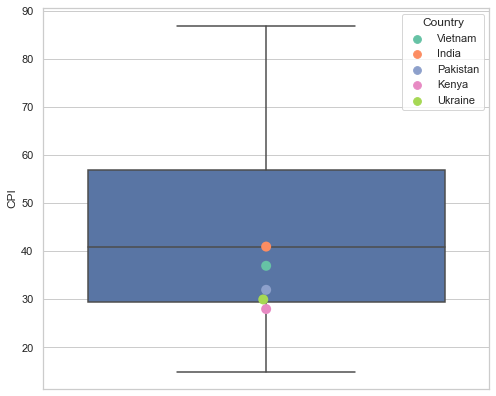

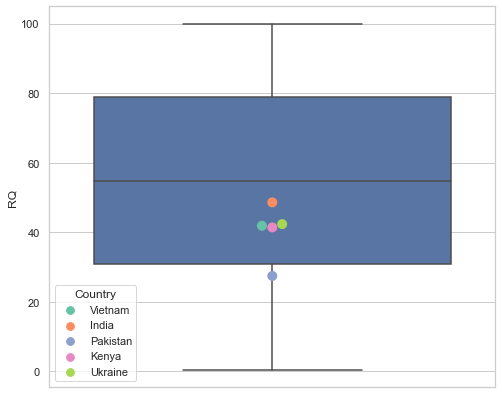

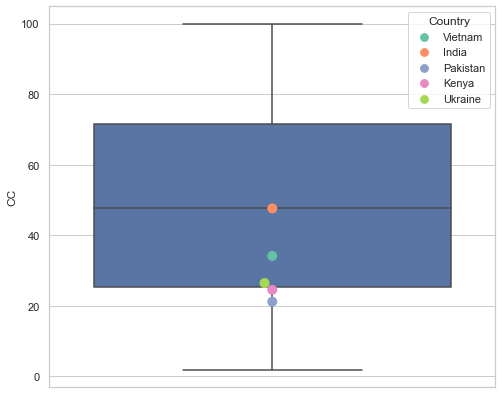

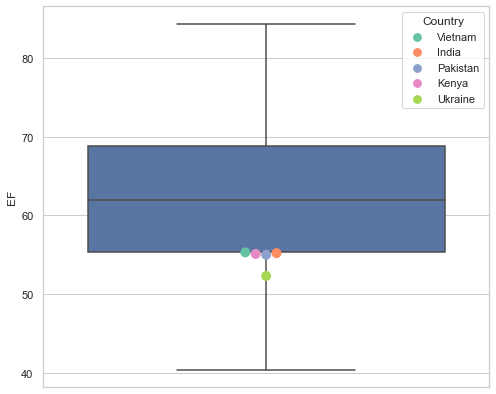

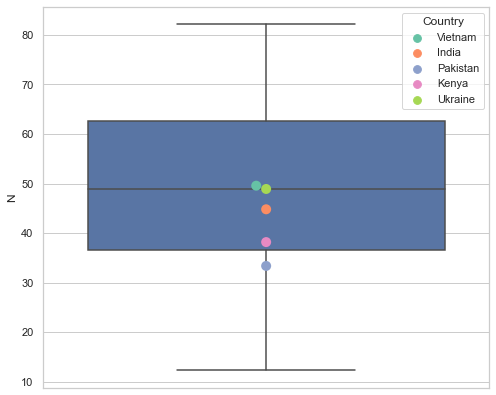

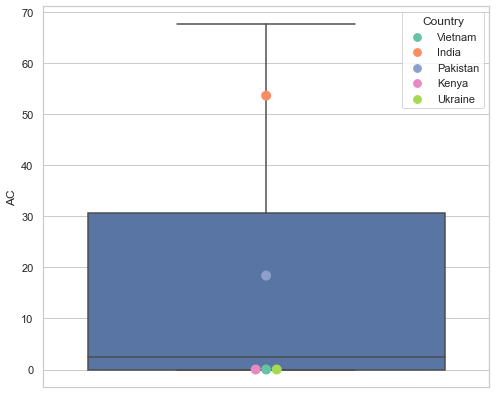

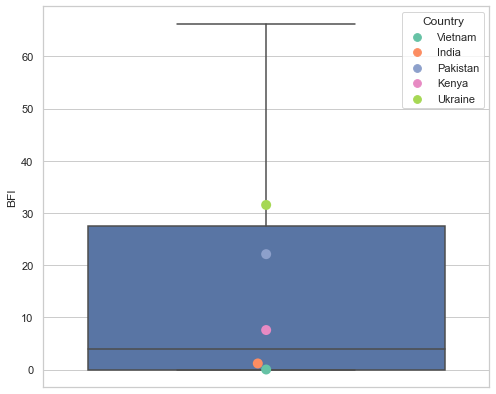

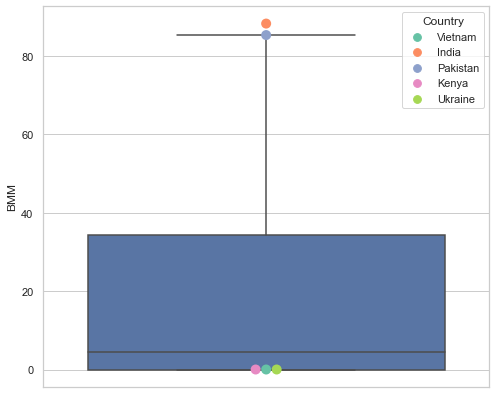

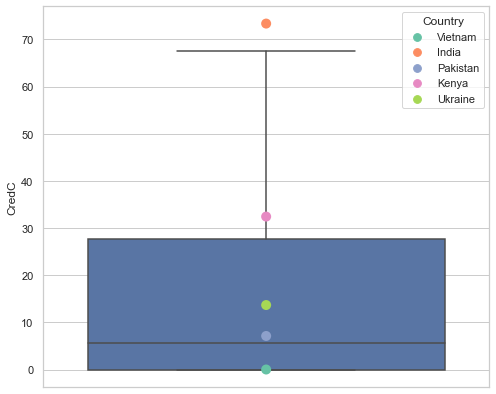

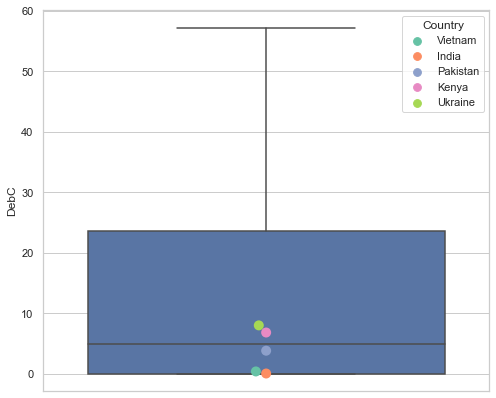

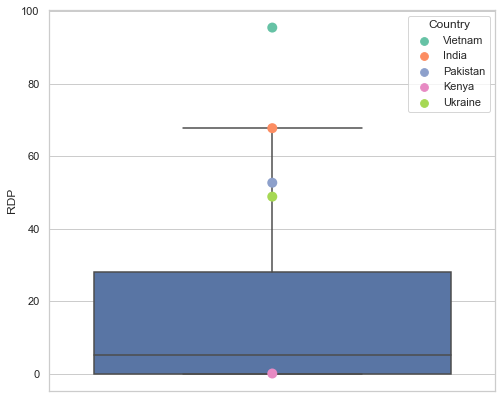

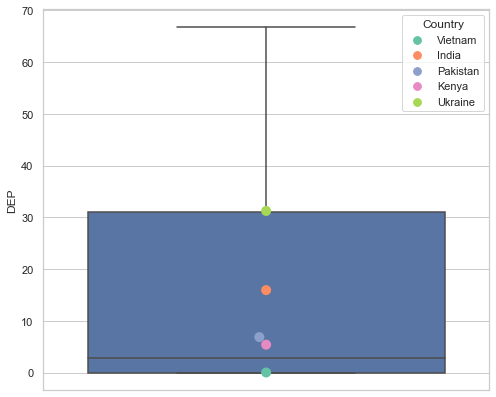

In [158]:
#Box Plots with 2021 Data
sns.set(style="whitegrid")
plt.rc('figure', figsize=(8, 7))
world = df_all_2021
top_5 = df_all_2021.filter(items =["Vietnam","India","Pakistan","Kenya","Ukraine"], axis = 0)
top_5 = top_5.reset_index()

for n in df_all_2021.columns:
    ax = sns.boxplot(y=df_all_2021[n], data=df_all_2021, showfliers = False)
    ax = sns.swarmplot(y=top_5[n], hue=top_5["Country"], x=[""]*len(top_5), data=top_5, palette="Set2", size=10)
    
    plt.savefig('../crypto_adoption_emerging_countries/output/box_plots/2021/box_plot_2021_' + n + '.png')
    plt.show()